In [89]:
import numpy as np
import matplotlib.pyplot as plt
import math

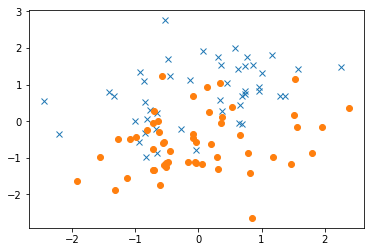

In [141]:
n = 100
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x_d2 = np.random.randn(n, 2) + 0
y_d2 = 2 * (omega * x_d2[:,0] + x_d2[:,1] + noise > 0) - 1

plt.plot(np.extract(y_d2>0,x_d2[:,0]),np.extract(y_d2>0,x_d2[:,1]), 'x')
plt.plot(np.extract(y_d2<0,x_d2[:,0]),np.extract(y_d2<0,x_d2[:,1]), 'o')

In [276]:
def steep():
    x=x_d2
    y=y_d2
    x[0,0]=1
    x[0,1]=1
    y[0]=1
    #step=0.08
    rate=1
    w=np.zeros((601,2))
    jfunction=[0]*50
    dj=[0]*4000
    for time in range(50):
        for i in range(100):
            jfunction[time]+=math.log(1+math.exp(-y[i]*np.dot(w[time],x[i])))
            dj[time]+=(math.exp(-y[i]*np.dot(w[time],x[i]))*(-y[i]*x[i]))/(1+math.exp(-y[i]*np.dot(w[time],x[i])))
            #dj[time]=(jfunction[time]-jfunction[time-1])*0.01
        jfunction[time]+=rate*np.dot(w[time],w[time])
        dj[time]+=2*rate*w[time]
        #print(dj[time])
        w[time+1]=w[time]-dj[time]*(1/(time+1))
    #print(-dj[0]*step)
    #f=zeros(n)
    #for i in range(n):
    #    if (np.dot(x[i],w[time])>0):
    #        f[i]=1
    #    else:
    #        f[i]=-1
    #print(f)
    #plt.plot(np.extract(f>0,x_d2[:,0]),np.extract(f>0,x_d2[:,1]),'w*')
    #plt.plot(np.extract(f<0,x_d2[:,0]),np.extract(f<0,x_d2[:,1]),'wx')
    #print(dj[0])
    #print(dj[1]*step)
    return w,jfunction

In [277]:
def newton():
    x=x_d2
    y=y_d2
    x[0,0]=1
    x[0,1]=1
    y[0]=1
    #step=0.08
    rate=1
    w=np.zeros((601,2))
    jfunction=[0]*50
    dj=[0]*2000
    p=[0]*1000
    ddj=[0]*2000
    II=np.eye(2)
    for time in range(50):
        for i in range(100):
            jfunction[time]+=math.log(1+math.exp(-y[i]*np.dot(w[time],x[i])))
            dj[time]+=(math.exp(-y[i]*np.dot(w[time],x[i]))*(-y[i]*x[i]))/(1+math.exp(-y[i]*np.dot(w[time],x[i])))
            #dj[time]=(jfunction[time]-jfunction[time-1])*0.01
            p[time]=1/(1+math.exp(-y[i]*np.dot(w[time],x[i])))
            ddj[time]+=p[time]*(1-p[time])*np.dot(np.transpose(x[i]),np.transpose(x[i]))
        jfunction[time]+=rate*np.dot(w[time],w[time])
        #print(ddj[time])
        dj[time]+=2*rate*w[time]
        #ddj[time]=dj[time]-dj[time-1]
        ddj[time]+=2*rate*II
        w[time+1]=w[time]-(1/(time+1))*np.dot(np.linalg.inv(ddj[time]),np.transpose(dj[time]))
    #print(step*np.dot(np.linalg.inv(ddj[1]),np.transpose(dj[1])))
    return w,jfunction

C:\Users\Guo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Guo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


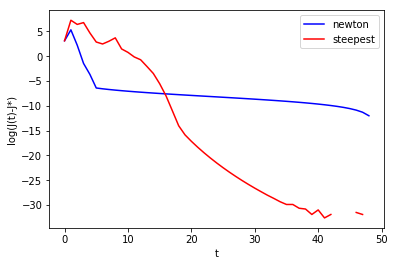

In [281]:
SW,SJ=steep()
#print(SJ-SJ[49])
NW,NJ=newton()
#k=SJ-NJ[40]
#kk=NJ-NJ[40]
#print(np.log(k))
plt.plot(np.log(NJ-NJ[49]),'b',label='newton')
plt.plot(np.log(SJ-SJ[49]),'r',label='steepest')
#print(SJ-SJ[45])
plt.xlabel('t')
plt.ylabel('log(J(t)-J*)')
plt.legend() 